In [1]:
# Impordid
import os
import numpy as np

# Korpuse lugemiseks
from estnltk.converters.conll import conll_importer

import matplotlib.pyplot as plt

In [2]:
def get_dataset_paths(dataset):
    dataset_dir = os.path.join('data', dataset)
    files = os.listdir(dataset_dir)
    
    paths = {}
    for split in ['train', 'dev', 'test']:
        matching_file = next(f for f in files if f'-ud-{split}.' in f)
        paths[split] = os.path.join(dataset_dir, matching_file)
    
    return paths

edt = get_dataset_paths('edt')
ewt = get_dataset_paths('ewt')
print(edt)
print(ewt)

{'train': 'data\\edt\\et_edt-ud-train.conllu', 'dev': 'data\\edt\\et_edt-ud-dev.conllu', 'test': 'data\\edt\\et_edt-ud-test.conllu'}
{'train': 'data\\ewt\\et_ewt-ud-train.conllu', 'dev': 'data\\ewt\\et_ewt-ud-dev.conllu', 'test': 'data\\ewt\\et_ewt-ud-test.conllu'}


In [3]:
def preprocess(dataset_path):
    dataset = conll_importer.conll_to_text(file=dataset_path)
    parsed_sents = []
    stats = {
        'words': 0,
        'sentences': 0
    }
    for sent in dataset.sentences:
        parsed_sent = []
        stats['sentences'] += 1
        for word, misc in zip(sent.words, sent.conll_syntax.misc):
            tag = 'O'
            if misc is not None:
                if 'NE' in misc:
                    tag = misc['NE']
            pair = (word.text.lower(), tag)
            stats['words'] += 1
            stats[tag] = stats.get(tag, 0) + 1
            #print(f"({word.text}, {tag})")
            parsed_sent.append(pair)
        parsed_sents.append(parsed_sent)
        
    return parsed_sents, stats            

In [4]:
ewt_dev_sents, ewt_dev_stats = preprocess(ewt['dev'])
ewt_train_sents, ewt_train_stats = preprocess(ewt['train'])
ewt_test_sents, ewt_test_stats = preprocess(ewt['test'])

In [5]:
edt_dev_sents, edt_dev_stats = preprocess(edt['dev'])
edt_train_sents, edt_train_stats = preprocess(edt['train'])
edt_test_sents, edt_test_stats = preprocess(edt['test'])

In [6]:
ewt_stats = {
    'dev' : ewt_dev_stats,
    'train' : ewt_train_stats,
    'test' : ewt_test_stats
}
edt_stats = {
    'dev' : edt_dev_stats,
    'train' : edt_train_stats,
    'test' : edt_test_stats
}

def plot_stats(stats, name):
  word_counts = [stats[split]['words'] for split in ['dev', 'train', 'test']]
  sent_counts = [stats[split]['sentences'] for split in ['dev', 'train', 'test']]

  splits = ['Dev', 'Train', 'Test']
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

  bars1 = ax1.bar(splits, word_counts, color='steelblue')
  ax1.set_title(f'Sõnade arv {name} andmestikus')
  ax1.set_ylabel('Sõnu')

  bars2 = ax2.bar(splits, sent_counts, color='darkgreen')
  ax2.set_title(f'Lausete arv {name} andmestikus')
  ax2.set_ylabel('Lauseid')

  def autolabel(ax, rects):
      for rect in rects:
          height = rect.get_height()
          ax.annotate(f'{int(height):,}',
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 0),
                      textcoords="offset points",
                      ha='center', va='bottom')

  autolabel(ax1, bars1)
  autolabel(ax2, bars2)

  plt.tight_layout()
  plt.show()

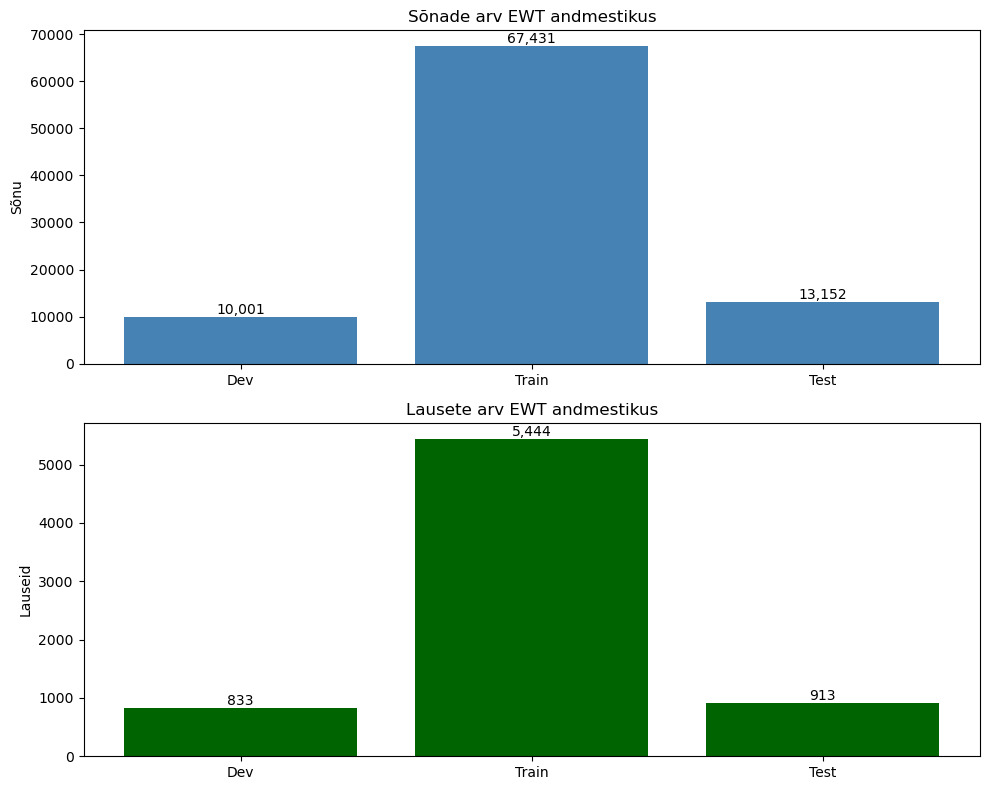

In [7]:
plot_stats(ewt_stats, 'EWT')

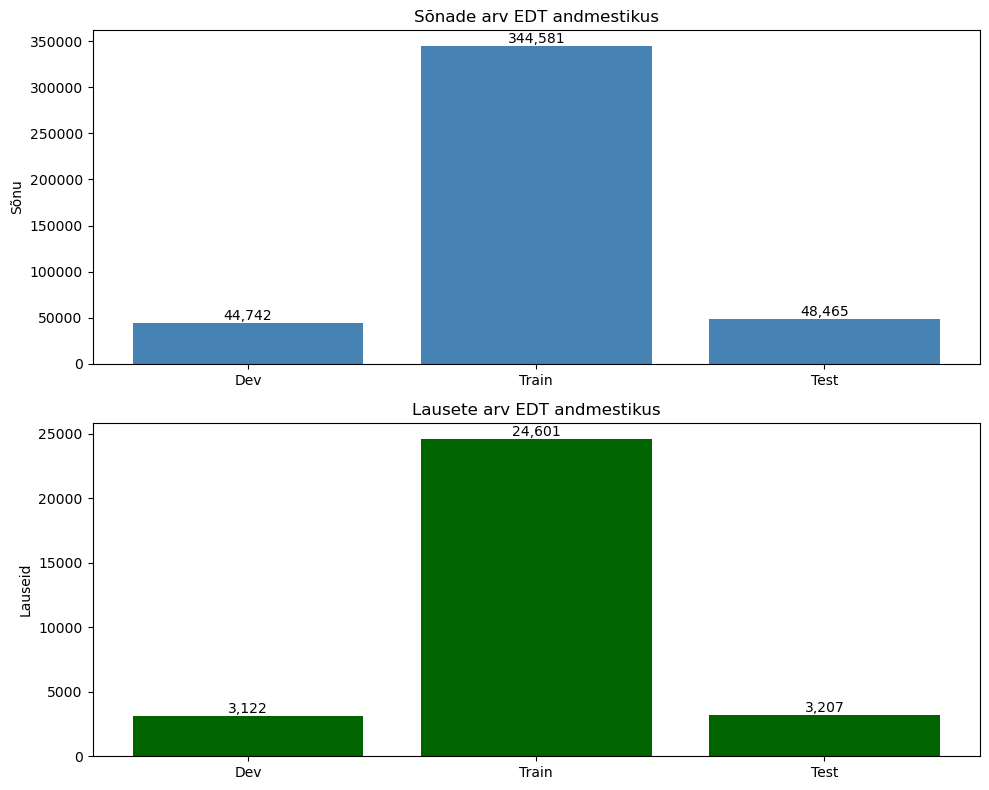

In [8]:
plot_stats(edt_stats, 'EDT')

In [9]:
def plot_tag_distribution(stats_dict, name, split_name):
    tag_counts = {k: v for k, v in stats_dict.items() 
                 if k not in ['words', 'sentences']}
    
    sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)
    tags, counts = zip(*sorted_tags)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Arvestame "O"
    bars1 = ax1.bar(tags, counts)
    ax1.set_title(f'Märgendite jaotus {name} {split_name} hulgas (arvestades "O")')
    ax1.set_ylabel('Arv')
    ax1.tick_params(axis='x', rotation=45)
    
    # Väärtused
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Ei arvesta "O"
    non_o_tags = [(tag, count) for tag, count in sorted_tags if tag != 'O']
    if non_o_tags:
        tags_no_o, counts_no_o = zip(*non_o_tags)
        bars2 = ax2.bar(tags_no_o, counts_no_o, color='darkgreen')
        ax2.set_title(f'Märgendite jaotus {name} {split_name} hulgas (ei arvesta "O")')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=45)
        
        # Väärtused
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom')
    
    plt.tight_layout()
    return fig

def plot_tag_distribution_all_splits(stats, name):
  for split in ['dev', 'train', 'test']:
      fig = plot_tag_distribution(stats[split], name, split.capitalize())
      plt.show()

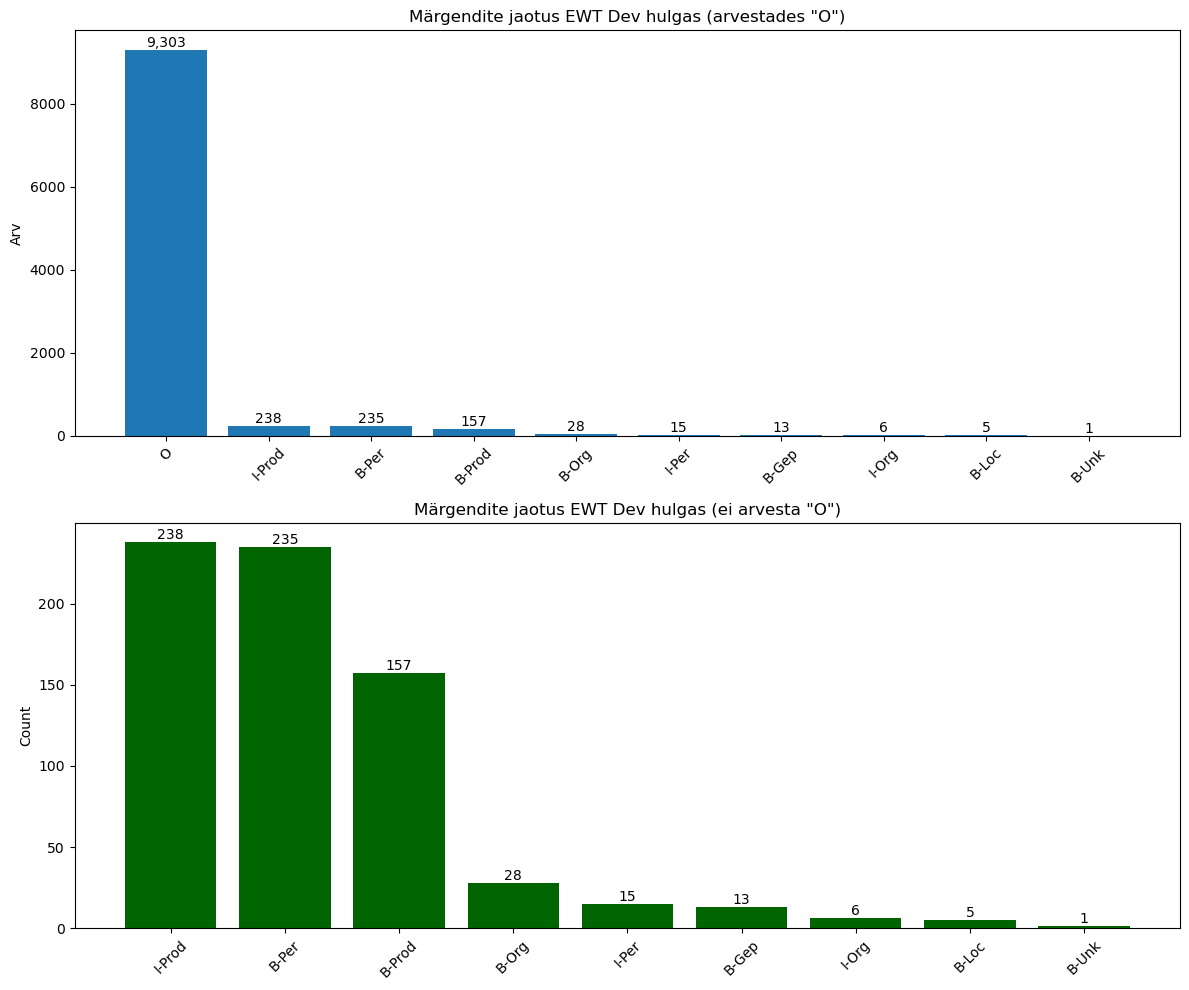

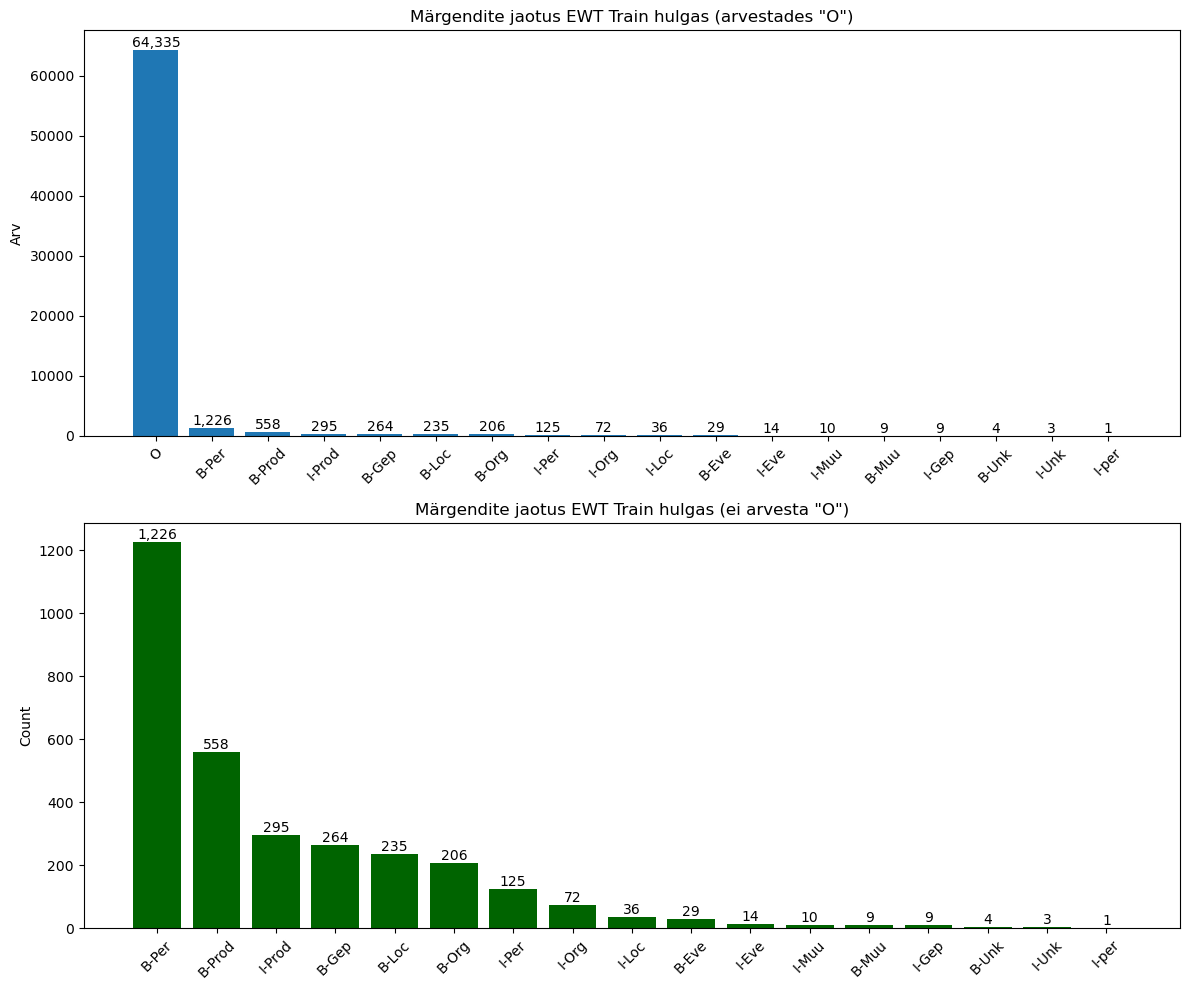

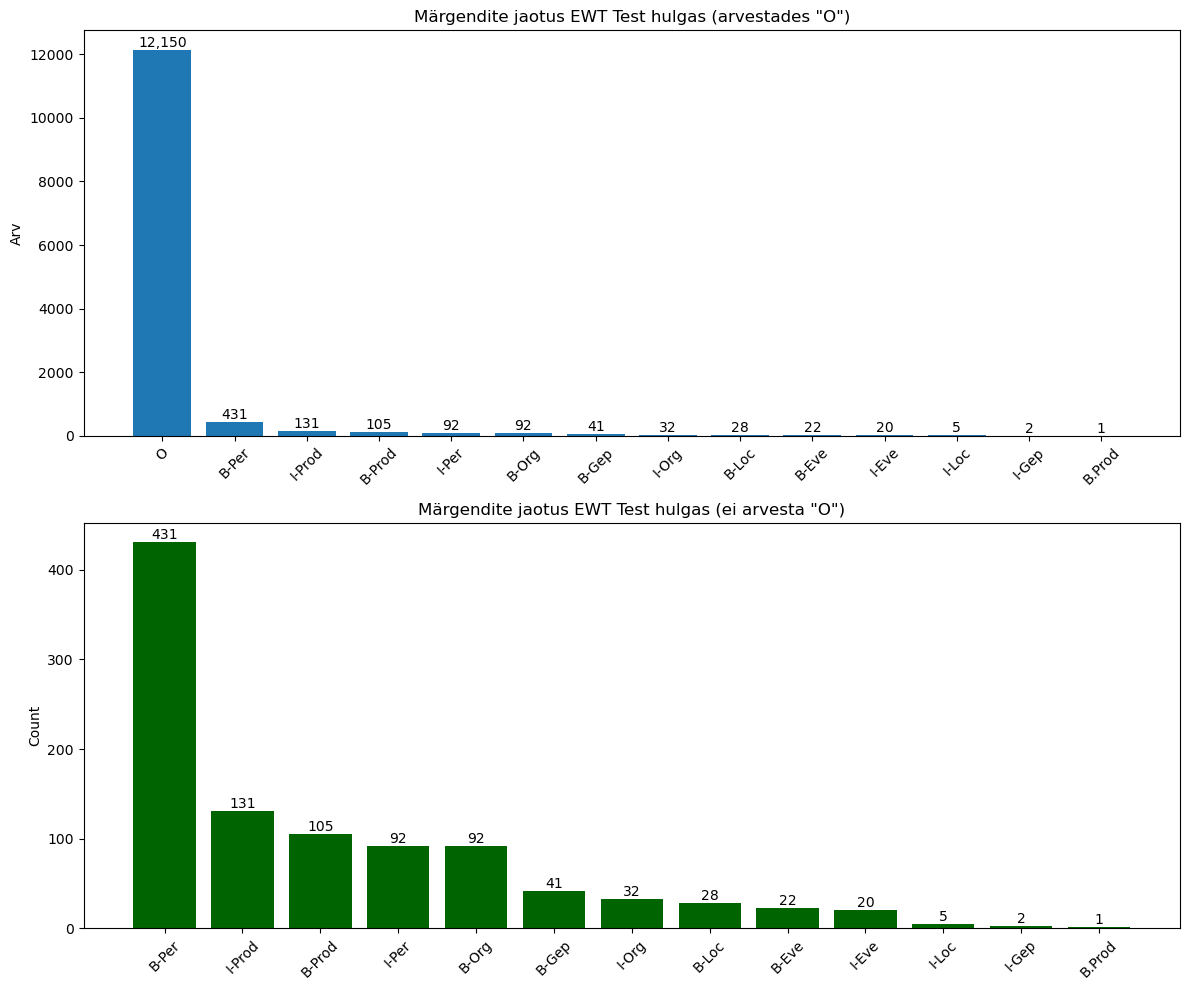

In [10]:
plot_tag_distribution_all_splits(ewt_stats, 'EWT')

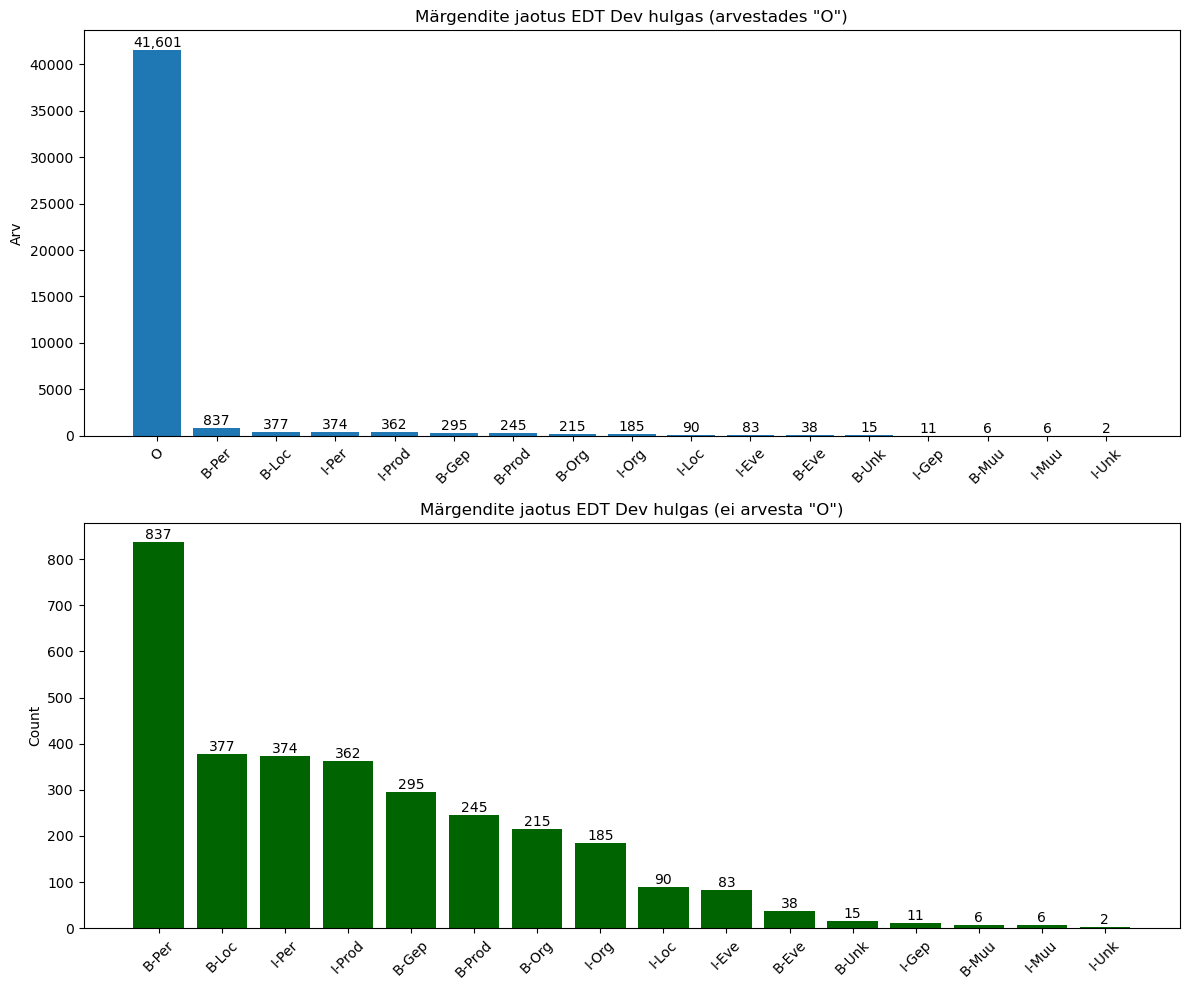

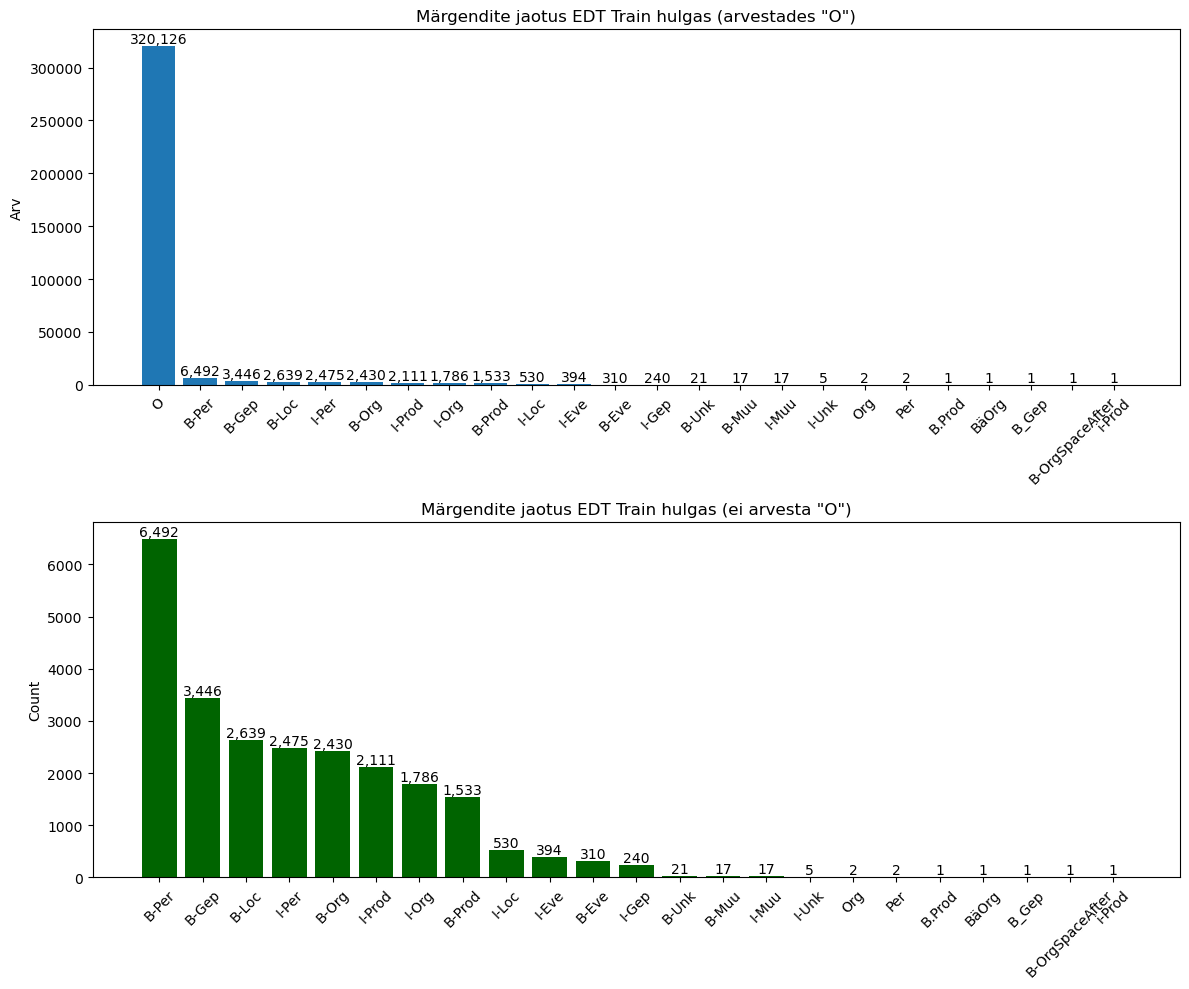

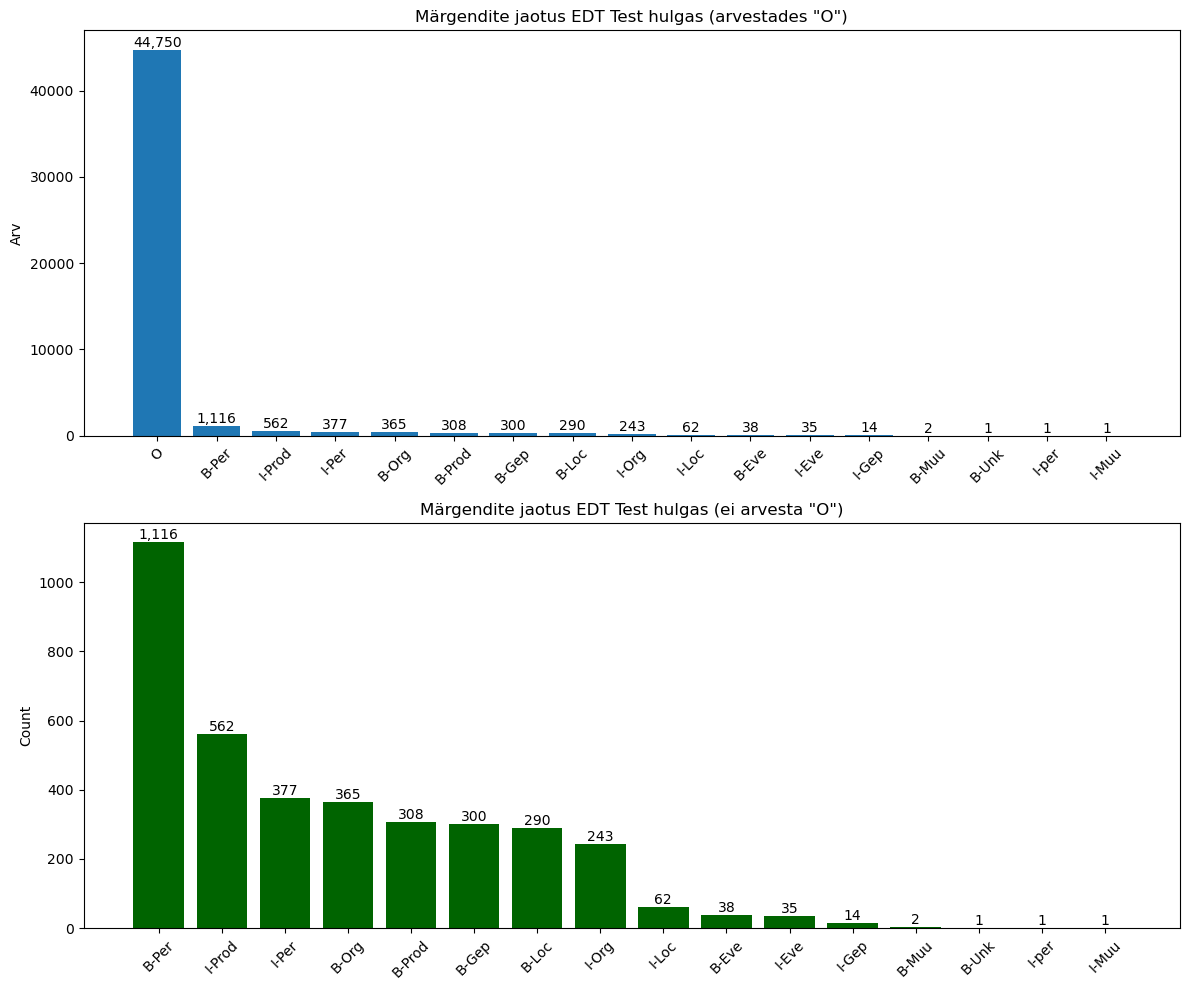

In [11]:
plot_tag_distribution_all_splits(edt_stats, 'EDT')